<a href="https://colab.research.google.com/github/OlhaZahrebelna/Project_data_salary/blob/main/Project_DOU_salery.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import kagglehub
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
path = kagglehub.dataset_download("arnabchaki/data-science-salaries-2023")

file_path = os.path.join(path, 'ds_salaries.csv')

df = pd.read_csv(file_path)
df.head(3)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S


In [ ]:
df.tail(3)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
3752,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
3753,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L
3754,2021,SE,FT,Data Science Manager,7000000,INR,94665,IN,50,IN,L


In [ ]:
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

In [ ]:
row, col = df.shape
print(f"Number of rows: {row}")
print(f"Number of columns: {col}")

Number of rows: 3755
Number of columns: 11


In [ ]:
df.isna().sum()

,0
work_year,0
experience_level,0
employment_type,0
job_title,0
salary,0
salary_currency,0
salary_in_usd,0
employee_residence,0
remote_ratio,0
company_location,0


In [ ]:
df.dtypes

,0
work_year,int64
experience_level,object
employment_type,object
job_title,object
salary,int64
salary_currency,object
salary_in_usd,int64
employee_residence,object
remote_ratio,int64
company_location,object


In [ ]:
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,3755.000000,3.755000e+03,3755.000000,3755.000000
mean,2022.373635,1.906956e+05,137570.389880,46.271638
std,0.691448,6.716765e+05,63055.625278,48.589050
min,2020.000000,6.000000e+03,5132.000000,0.000000
25%,2022.000000,1.000000e+05,95000.000000,0.000000
50%,2022.000000,1.380000e+05,135000.000000,0.000000
75%,2023.000000,1.800000e+05,175000.000000,100.000000
max,2023.000000,3.040000e+07,450000.000000,100.000000


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
work_year,3755.0,2022.373635,0.691448,2020.0,2022.0,2022.0,2023.0,2023.0
salary,3755.0,190695.571771,671676.500508,6000.0,100000.0,138000.0,180000.0,30400000.0
salary_in_usd,3755.0,137570.389880,63055.625278,5132.0,95000.0,135000.0,175000.0,450000.0
remote_ratio,3755.0,46.271638,48.589050,0.0,0.0,0.0,100.0,100.0


In [ ]:
df.groupby(['job_title']).agg({'salary_in_usd': 'mean'}).sort_values(by='salary_in_usd', ascending=False).head(10)

,salary_in_usd
job_title,
Data Science Tech Lead,375000.000000
Cloud Data Architect,250000.000000
Data Lead,212500.000000
Data Analytics Lead,211254.500000
Principal Data Scientist,198171.125000
Director of Data Science,195140.727273
Principal Data Engineer,192500.000000
Machine Learning Software Engineer,192420.000000
Data Science Manager,191278.775862


In [ ]:
def top_10_values(column):
    value_counts = column.value_counts()
    top_10 = value_counts.head(10)
    return top_10

In [ ]:
for column in df.columns:
    top_10 = top_10_values(df[column])
    print(f"Top 10 values for column '{column}':")
    print(top_10)
    print()


Top 10 values for column 'work_year':
work_year
2023    1785
2022    1664
2021     230
2020      76
Name: count, dtype: int64

Top 10 values for column 'experience_level':
experience_level
SE    2516
MI     805
EN     320
EX     114
Name: count, dtype: int64

Top 10 values for column 'employment_type':
employment_type
FT    3718
PT      17
CT      10
FL      10
Name: count, dtype: int64

Top 10 values for column 'job_title':
job_title
Data Engineer                1040
Data Scientist                840
Data Analyst                  612
Machine Learning Engineer     289
Analytics Engineer            103
Data Architect                101
Research Scientist             82
Data Science Manager           58
Applied Scientist              58
Research Engineer              37
Name: count, dtype: int64

Top 10 values for column 'salary':
salary
100000    112
150000    100
120000     99
160000     85
130000     85
200000     65
140000     64
135000     63
80000      58
145000     54
Name: count,

We observe that the amount of data-related work increases every year, with significant growth from 2020 to 2022. This information is valuable for people interested in the field and those considering a career change. We also see that there are many employees at the senior specialist level but fewer at the executive or expert level. This insight is useful for companies with fewer employees, as they can delegate most of the work to senior specialists. With a manageable workload, it can be assigned to one person, which helps reduce the budget. Most employees work full-time, indicating trends in employment conditions.
The top roles in data-related fields are Data Engineer, Data Scientist, and Data Analyst, with Data Engineers being the most common (1040 instances).
Specialized roles like Machine Learning Engineer and Data Architect are also prominent, though less frequent.
This distribution highlights the demand for core data skills, especially in engineering and analysis, which suggests that data engineering and data science expertise are highly valued across industries.
The most frequent salary levels are 100,000, 150,000, 120,000. Salaries range widely, reaching up to 200,000, indicating that there is a competitive salary structure within these data-focused roles, with multiple levels of experience and responsibilities likely influencing these differences.
The predominant salary currency is USD (3,224 instances), followed by EUR and GBP.
This suggests that many positions are based in or associated with countries where USD is the standard or preferred currency, reflecting the presence of international or US-based companies in data professions.
Salary in USD:
The most common salary amounts in USD are similar to the primary salary column, with frequent values around 100,000 and 150,000.
This conversion aids in making salary comparisons more consistent across different countries and regions, providing insights into competitive benchmarks in USD terms.
The majority of employees reside in the US (3,004), with fewer residing in countries like the UK, Canada, and Spain.
This distribution highlights that the data workforce is highly concentrated in the US, suggesting strong demand and opportunities in the US market, although there are notable presences in other regions as well.
The data shows that 0% remote (office-based) work is most common, followed closely by 100% remote (fully remote work), and then 50% remote (hybrid).
This mix suggests a trend where fully remote work is becoming almost as popular as office work, likely influenced by the adaptability of data-related roles to remote setups.
Most companies are based in the US, followed by the UK, Canada, and Spain.
This aligns with the employee residence data, emphasizing the concentration of data jobs in US-based companies, though there is a global distribution that includes Europe, Canada, and parts of Asia.
The majority of companies fall into the medium (M) size category, followed by large (L) and then small (S).
This indicates that medium-sized companies are highly involved in data-related hiring, while large corporations also contribute significantly to employment in this field. Smaller companies, although less frequent, also contribute to the demand, especially for specialized roles.


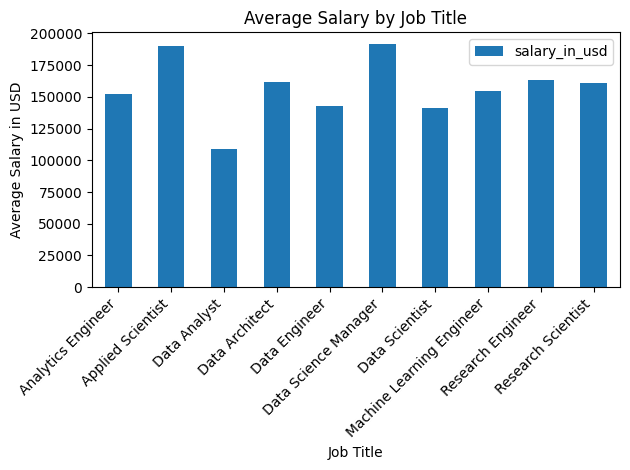

In [ ]:
top_10_jobs = top_10_values(df['job_title']).index

filtered_df_jobs = df[df['job_title'].isin(top_10_jobs)]

filtered_df_jobs.pivot_table(index='job_title', values='salary_in_usd', aggfunc='mean').plot(kind='bar')
plt.xlabel('Job Title')
plt.ylabel('Average Salary in USD')
plt.title('Average Salary by Job Title')
plt.xticks(rotation=45, ha='right')
plt.tight_layout();

In [ ]:
top_10_experience = top_10_values(df['experience_level']).index

filtered_df = df[df['experience_level'].isin(top_10_experience)]

filtered_df.pivot_table(index='experience_level', values='salary_in_usd', aggfunc='mean').sort_values(by='salary_in_usd', ascending=False)

,salary_in_usd
experience_level,
EX,194930.929825
SE,153051.071542
MI,104525.939130
EN,78546.284375


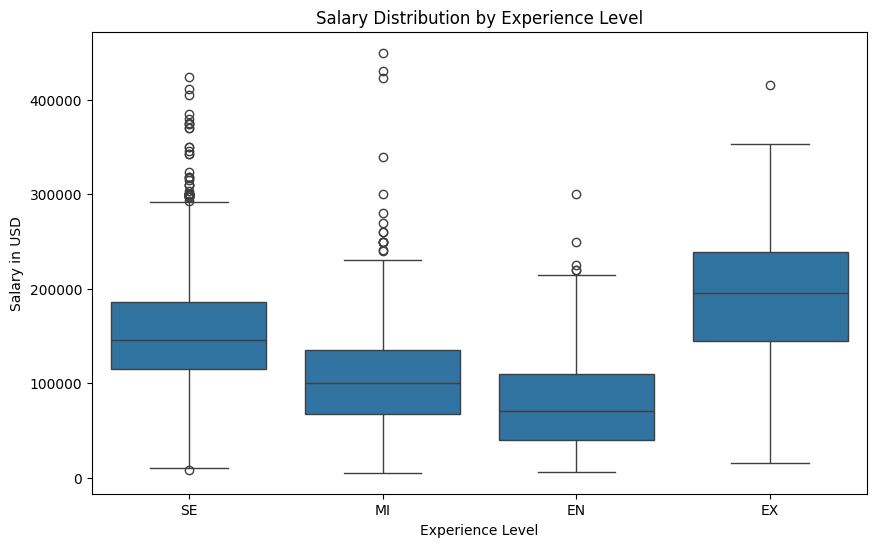

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='experience_level', y='salary_in_usd', data=df)
plt.xlabel('Experience Level')
plt.ylabel('Salary in USD')
plt.title('Salary Distribution by Experience Level');

In [ ]:
top_10_residence = top_10_values(df['employee_residence']).index

filtered_df = df[df['employee_residence'].isin(top_10_residence)]

filtered_df.pivot_table(index='employee_residence', values='salary_in_usd', aggfunc='mean').sort_values(by='salary_in_usd', ascending=False)


,salary_in_usd
employee_residence,
US,152822.011651
CA,132222.905882
DE,94772.250000
GB,86988.323353
FR,61492.500000
ES,60463.350000
GR,55136.062500
PT,53059.000000
BR,48927.111111


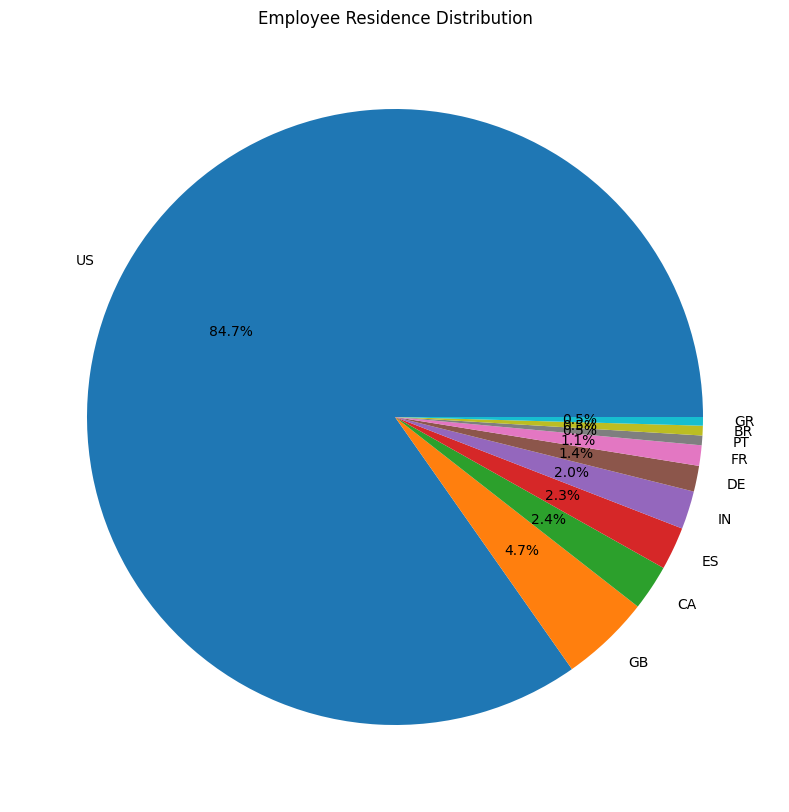

In [ ]:
plt.figure(figsize=(15,10))
plt.pie(filtered_df['employee_residence'].value_counts(), labels=filtered_df['employee_residence'].value_counts().index, autopct='%1.1f%%')
plt.title('Employee Residence Distribution');

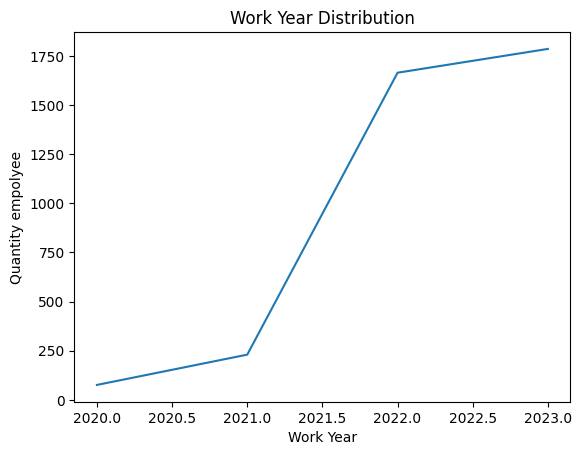

In [ ]:
work_year_counts = df['work_year'].value_counts().sort_index()
plt.plot(work_year_counts.index, work_year_counts.values)
plt.xlabel('Work Year')
plt.ylabel('Quantity empolyee')
plt.title('Work Year Distribution');

In [ ]:
pd.crosstab(df['employment_type'], df['experience_level'])

experience_level,EN,EX,MI,SE
employment_type,,,,
CT,2,1,5,2
FL,2,0,5,3
FT,302,113,792,2511
PT,14,0,3,0
